In [81]:
import os, sys
import gc

import matplotlib.pylab as plt
%pylab inline

import pandas as pd

from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
IMAGE_DIM = 3

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['resize', 'imread', 'imshow', 'plt', 'concatenate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Read files, resize them (256,256,3) and store them as np.arrays

In [61]:
from tqdm import tnrange, tqdm_notebook

root = ".\Input\stage1_train"
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]

X_train = np.zeros((len(dirlist),IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_DIM), dtype=np.uint8) 
y_train = np.zeros((len(dirlist),IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.bool)

print('Getting and resizing train images and masks ... ')
for i in tnrange(len(dirlist)):
    image_root = "{}\{}\images\{}.png".format(root, dirlist[i],dirlist[i])
    img = imread(image_root)[:,:,:IMAGE_DIM]
    img = resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH), mode='constant', preserve_range=True)
    X_train[i] = img
    
    mask_root = "{}\{}\masks".format(root, dirlist[i])
    masklist = [item for item in os.listdir(mask_root) if os.path.isfile(os.path.join(mask_root, item))]

    mask = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.bool)
    for msk in masklist:
        temp_mask = imread(mask_root+'\\'+msk)
        temp_mask = np.expand_dims(resize(temp_mask, (IMAGE_HEIGHT, IMAGE_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, temp_mask)
    y_train[i] = mask

root = ".\Input\stage1_test"
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]

X_test = np.zeros((len(dirlist), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DIM), dtype=np.uint8)
sizes_test = []
test_ids = []
print('Getting and resizing test images ... ')
for i in tnrange(len(dirlist)):
    test_ids.append(dirlist[i])
    image_root = "{}\{}\images\{}.png".format(root, dirlist[i], dirlist[i])
    img = imread(image_root)[:,:,:IMAGE_DIM]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH), mode='constant', preserve_range=True)
    X_test[i] = img

Getting and resizing test images ... 


In [182]:
#save the arrays
np.save("X_train", X_train)
np.save("y_train", y_train)
np.save("X_test", X_test)

In [2]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")

# Implement transformation on images (and masks alike?) to increase training set size

In [3]:
#data normalization
X_norm_train = np.array([i/255 for i in X_train])
X_norm_test = np.array([i/255 for i in X_test])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 670 + 1) instead
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 670 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 670 + 1) instead
  after removing the cwd from sys.path.


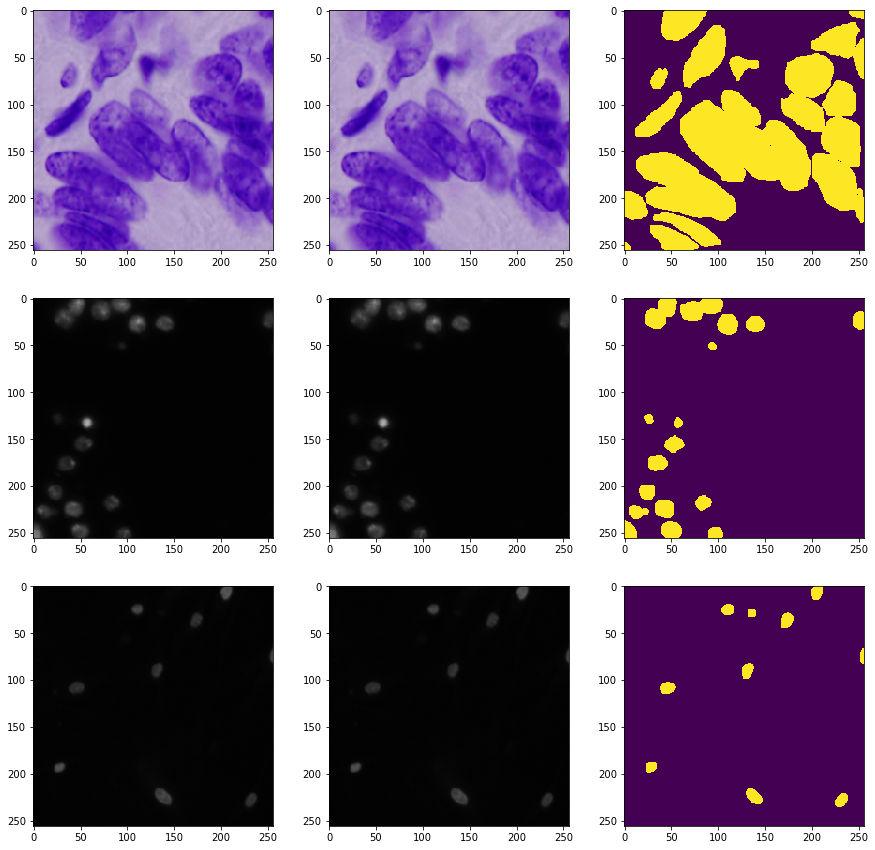

In [4]:
#plot to check if everthing is ok
r1 = np.random.random_integers(len(X_train))
r2 = np.random.random_integers(len(X_train))
r3 = np.random.random_integers(len(X_train))

fig = plt.figure(figsize=(15,15))
plt.subplot(331)
plt.imshow(X_train[r1])
plt.subplot(332)
plt.imshow(X_norm_train[r1])
plt.subplot(333)
plt.imshow(np.squeeze(y_train[r1]))
plt.subplot(334)
plt.imshow(X_train[r2])
plt.subplot(335)
plt.imshow(X_norm_train[r2])
plt.subplot(336)
plt.imshow(np.squeeze(y_train[r2]))
plt.subplot(337)
plt.imshow(X_train[r3])
plt.subplot(338)
plt.imshow(X_norm_train[r3])
plt.subplot(339)
plt.imshow(np.squeeze(y_train[r3]))

# Train artificial neural networks

In [ ]:
#Input
#Conv
#MaxPool
#Conv
#MaxPool
#Conv
#Conv
#Conv
#MaxPool
#flatten
#Dense
#Dense
#Dense


In [113]:
def get_CNN_model(input_shape):
    
    X_input = Input(input_shape)
    
    x = Conv2D(32,(3,3), strides=(1,1), activation='relu', padding='same',
              kernel_initializer='glorot_normal')(X_input)
    
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x = Conv2D(64,(3,3), strides=(1,1), activation='relu', padding='same',
              kernel_initializer='glorot_normal')(x)
    
    x = MaxPooling2D()(x)
    
    x = Conv2D(64,(2,2))(x)
    
    x = Conv2D(64,(2,2))(x)
    
    x = Conv2D(64,(2,2))(x)
    
    x = MaxPooling2D()(x)
    
    x = Conv2DTranspose(1, (227,227), activation='sigmoid')(x)
    
    model = Model(inputs=[X_input], outputs=[x])
    
    return model

### 1. Conventional CNN

In [114]:
CNN_model = get_CNN_model((IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_DIM))

In [115]:
CNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 63, 63, 64)        16448     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 62, 62, 64)        16448     
__________

In [121]:
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
CNN_model.fit(X_norm_train, y_train, batch_size=12, epochs=1, verbose=1)

Epoch 1/1
670/670 [==============================] - ETA: 14:39 - loss: 0.6428 - acc: 0.79 - ETA: 13:40 - loss: 0.7356 - acc: 0.76 - ETA: 13:10 - loss: 0.6739 - acc: 0.80 - ETA: 12:58 - loss: 0.6429 - acc: 0.81 - ETA: 12:47 - loss: 0.6308 - acc: 0.81 - ETA: 12:35 - loss: 0.6193 - acc: 0.80 - ETA: 12:27 - loss: 0.6065 - acc: 0.81 - ETA: 12:19 - loss: 0.5986 - acc: 0.80 - ETA: 11:57 - loss: 0.5777 - acc: 0.81 - ETA: 11:38 - loss: 0.5659 - acc: 0.82 - ETA: 11:18 - loss: 0.5581 - acc: 0.82 - ETA: 10:59 - loss: 0.5442 - acc: 0.82 - ETA: 10:41 - loss: 0.5518 - acc: 0.82 - ETA: 10:23 - loss: 0.5531 - acc: 0.81 - ETA: 10:06 - loss: 0.5453 - acc: 0.81 - ETA: 9:50 - loss: 0.5431 - acc: 0.8151 - ETA: 9:34 - loss: 0.5468 - acc: 0.812 - ETA: 9:18 - loss: 0.5395 - acc: 0.816 - ETA: 9:02 - loss: 0.5353 - acc: 0.818 - ETA: 8:46 - loss: 0.5340 - acc: 0.818 - ETA: 8:31 - loss: 0.5320 - acc: 0.818 - ETA: 8:15 - loss: 0.5255 - acc: 0.822 - ETA: 8:00 - loss: 0.5189 - acc: 0.824 - ETA: 7:45 - loss: 0.5128 -

In [124]:
predCNN = CNN_model.predict(X_norm_train)

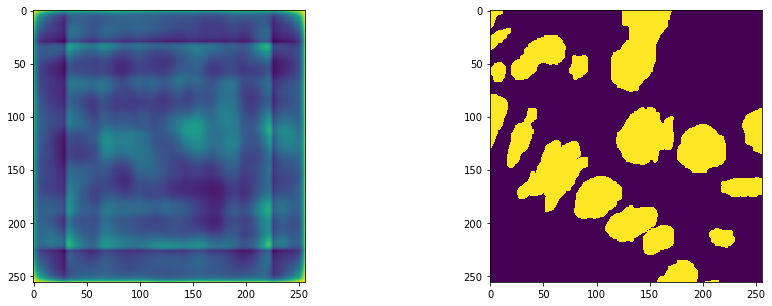

In [136]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(np.squeeze(predCNN[5]))
plt.subplot(122)
plt.imshow(np.squeeze(y_train[129]))

## 2. U-NET

In [165]:
import tensorflow as tf
from keras import backend as K
# Define IoU metric
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [181]:
#import libraries
from keras.models import Sequential, Model
from keras.layers import Conv2D,Conv2DTranspose, MaxPooling2D, Flatten, Dense, Dropout, Input, concatenate

# Build U-Net model
inputs = Input((IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DIM))
s = inputs

c1 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(1024, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Conv2D(1024, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_465 (Conv2D)             (None, 256, 256, 64) 1792        input_39[0][0]                   
__________________________________________________________________________________________________
conv2d_466 (Conv2D)             (None, 256, 256, 64) 36928       conv2d_465[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_159 (MaxPooling2D (None, 128, 128, 64) 0           conv2d_466[0][0]                 
__________________________________________________________________________________________________
conv2d_467

In [175]:
## import libraries
from keras.models import Sequential, Model
from keras.layers import Conv2D,Conv2DTranspose, MaxPooling2D, Flatten, Dense, Dropout, Input, concatenate

# Build U-Net model
inputs = Input((IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DIM))
s = inputs

c1 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)
p5 = MaxPooling2D(pool_size=(2,2))(c5)

c6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p5)
c6 = Dropout(0.3) (c6)
c6 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c6)
p6 = MaxPooling2D(pool_size=(2,2))(c6)

c7 = Conv2D(512, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p6)
c7 = Dropout(0.3)(c7)
c7 = Conv2D(512, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c6])
c8 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.2) (c8)
c8 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c5])
c9 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.2) (c9)
c9 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c9)

u10 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c9)
u10 = concatenate([u10, c4])
c10 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u10)
c10 = Dropout(0.1) (c10)
c10 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c10)

u11 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c10)
u11 = concatenate([u11, c3], axis=3)
c11 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u11)
c11 = Dropout(0.1) (c11)
c11 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c11)

u12 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c11)
u12 = concatenate([u12, c2], axis=3)
c12 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u12)
c12 = Dropout(0.1) (c12)
c12 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c12)

u13 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c12)
u13 = concatenate([u13, c1], axis=3)
c13 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u13)
c13 = Dropout(0.1) (c13)
c13 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c13)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c13)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_438 (Conv2D)             (None, 256, 256, 8)  224         input_38[0][0]                   
__________________________________________________________________________________________________
dropout_190 (Dropout)           (None, 256, 256, 8)  0           conv2d_438[0][0]                 
__________________________________________________________________________________________________
conv2d_439 (Conv2D)             (None, 256, 256, 8)  584         dropout_190[0][0]                
__________________________________________________________________________________________________
max_poolin

__________________________________________________________________________________________________
concatenate_53 (Concatenate)    (None, 32, 32, 128)  0           conv2d_transpose_61[0][0]        
                                                                 conv2d_445[0][0]                 
__________________________________________________________________________________________________
conv2d_456 (Conv2D)             (None, 32, 32, 64)   73792       concatenate_53[0][0]             
__________________________________________________________________________________________________
dropout_199 (Dropout)           (None, 32, 32, 64)   0           conv2d_456[0][0]                 
__________________________________________________________________________________________________
conv2d_457 (Conv2D)             (None, 32, 32, 64)   36928       dropout_199[0][0]                
__________________________________________________________________________________________________
conv2d_tra

In [176]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#filepath = '/models/'

callbacks = [EarlyStopping(monitor = 'val_mean_iou', min_delta=0, patience=0, verbose=1, mode='auto'),
            #ModelCheckpoint(filepath, monitor='val_mean_iou', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
            ]

model.fit(X_norm_train, y_train, validation_split=0.1, epochs=10, batch_size=12, callbacks=callbacks, verbose=1)

Train on 603 samples, validate on 67 samples
Epoch 1/10
603/603 [==============================] - ETA: 13:12 - loss: 0.6933 - mean_iou: 0.0000e+0 - ETA: 9:23 - loss: 0.6899 - mean_iou: 0.2029    - ETA: 8:02 - loss: 0.6876 - mean_iou: 0.27 - ETA: 7:21 - loss: 0.6845 - mean_iou: 0.31 - ETA: 6:54 - loss: 0.6839 - mean_iou: 0.34 - ETA: 6:38 - loss: 0.6824 - mean_iou: 0.35 - ETA: 6:21 - loss: 0.6795 - mean_iou: 0.36 - ETA: 6:10 - loss: 0.6743 - mean_iou: 0.37 - ETA: 5:56 - loss: 0.6657 - mean_iou: 0.38 - ETA: 5:42 - loss: 0.6538 - mean_iou: 0.38 - ETA: 5:30 - loss: 0.6400 - mean_iou: 0.38 - ETA: 5:19 - loss: 0.6354 - mean_iou: 0.39 - ETA: 5:08 - loss: 0.6266 - mean_iou: 0.39 - ETA: 4:58 - loss: 0.6204 - mean_iou: 0.39 - ETA: 4:48 - loss: 0.6174 - mean_iou: 0.40 - ETA: 4:38 - loss: 0.6090 - mean_iou: 0.40 - ETA: 4:30 - loss: 0.6039 - mean_iou: 0.40 - ETA: 4:20 - loss: 0.6005 - mean_iou: 0.40 - ETA: 4:11 - loss: 0.5993 - mean_iou: 0.40 - ETA: 4:02 - loss: 0.5936 - mean_iou: 0.40 - ETA: 3:53 

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#filepath = '/models/'

callbacks = [EarlyStopping(monitor = 'val_mean_iou', min_delta=0, patience=0, verbose=1, mode='auto'),
            #ModelCheckpoint(filepath, monitor='val_mean_iou', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
            ]

model.fit(X_norm_train, y_train, validation_split=0.1, epochs=10, batch_size=12, callbacks=callbacks, verbose=1)

Train on 603 samples, validate on 67 samples
Epoch 1/10
 96/603 [===>..........................] - ETA: 1:43:20 - loss: 0.6755 - acc: 0.59 - ETA: 1:41:49 - loss: 0.5593 - acc: 0.73 - ETA: 1:38:11 - loss: 0.9190 - acc: 0.76 - ETA: 1:36:10 - loss: 0.9703 - acc: 0.73 - ETA: 1:36:31 - loss: 0.9000 - acc: 0.75 - ETA: 1:35:23 - loss: 0.8609 - acc: 0.72 - ETA: 1:32:44 - loss: 0.8073 - acc: 0.74 - ETA: 1:31:20 - loss: 0.7698 - acc: 0.7544

In [23]:
pred = model.predict(X_norm_train)

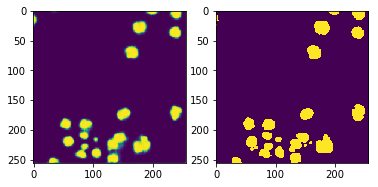

In [24]:
plt.subplot(121)
plt.imshow(np.squeeze(pred[0]))
plt.subplot(122)
plt.imshow(np.squeeze(y_train[0]))

In [177]:
preds_test = model.predict(X_norm_test)
# Threshold predictions
#preds_train_t = (preds_train > 0.5).astype(np.uint8)
#preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))

In [178]:
# Run-length encoding stolen from https://www.kaggle.com/rakhlin/fast-run-length-encoding-python
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cutoff=0.5):
    lab_img = label(x > cutoff)
    for i in range(1, lab_img.max() + 1):
        yield rle_encoding(lab_img == i)

In [179]:
new_test_ids = []
rles = []
for n, id_ in enumerate(test_ids):
    rle = list(prob_to_rles(preds_test_upsampled[n]))
    rles.extend(rle)
    new_test_ids.extend([id_] * len(rle))

In [180]:
# Create submission DataFrame
import datetime

now = (datetime.datetime.now())
now = now.strftime("%d%m%y_%H:%M")
sub = pd.DataFrame()
sub['ImageId'] = new_test_ids
sub['EncodedPixels'] = pd.Series(rles).apply(lambda x: ' '.join(str(y) for y in x))
now = datetime.datetime.now()
sub.to_csv('UNET{}.csv'.format(now.strftime("%d-%m-%H-%M")), index=False)